In [1]:
from utils import base_model, feature_importance, preprocessing, model_report, roc_auc_curve_plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import os

In [2]:
df = pd.read_csv('data/Bank Customer Churn Prediction.csv')

In [3]:
X, y = preprocessing(df)

In [4]:
random.seed(42)
os.environ["PYTHONHASHSEED"] = str(42)
np.random.seed(42)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

최적 하이퍼 파라미터:  {'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 263}
최고 예측 정확도: 0.9464
Accuracy: 0.8300
AUC: 0.8615
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       647
           1       0.55      0.67      0.60       153

    accuracy                           0.83       800
   macro avg       0.73      0.77      0.75       800
weighted avg       0.85      0.83      0.84       800



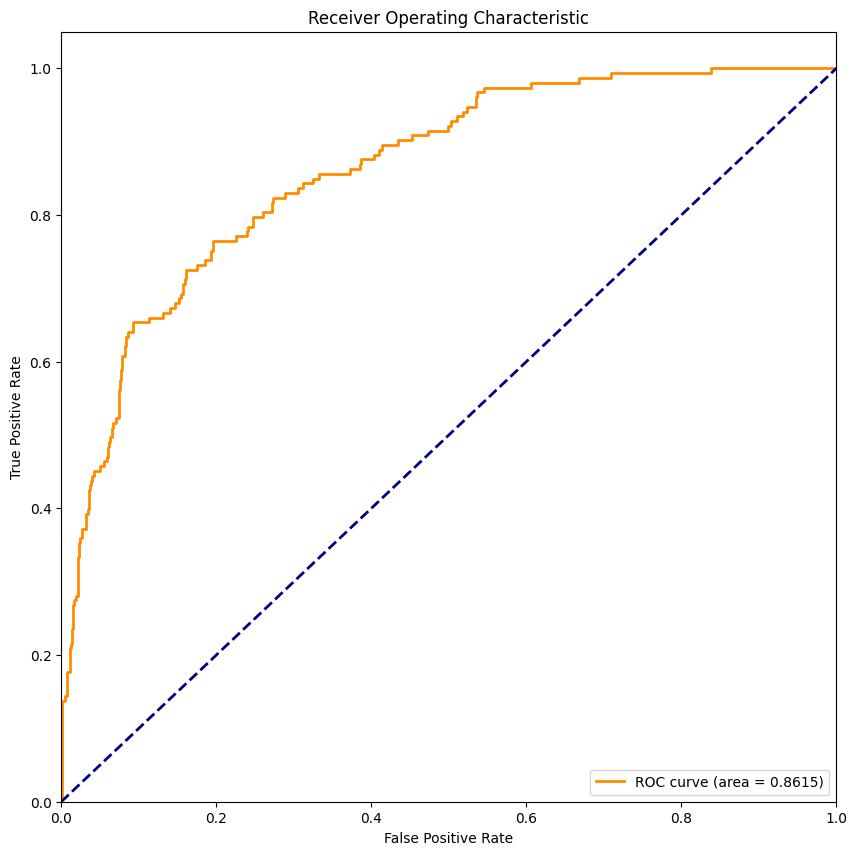

In [6]:
model = base_model(X_train, y_train)

Accuracy: 0.8345
AUC: 0.8596
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1607
           1       0.57      0.67      0.61       393

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.85      0.83      0.84      2000



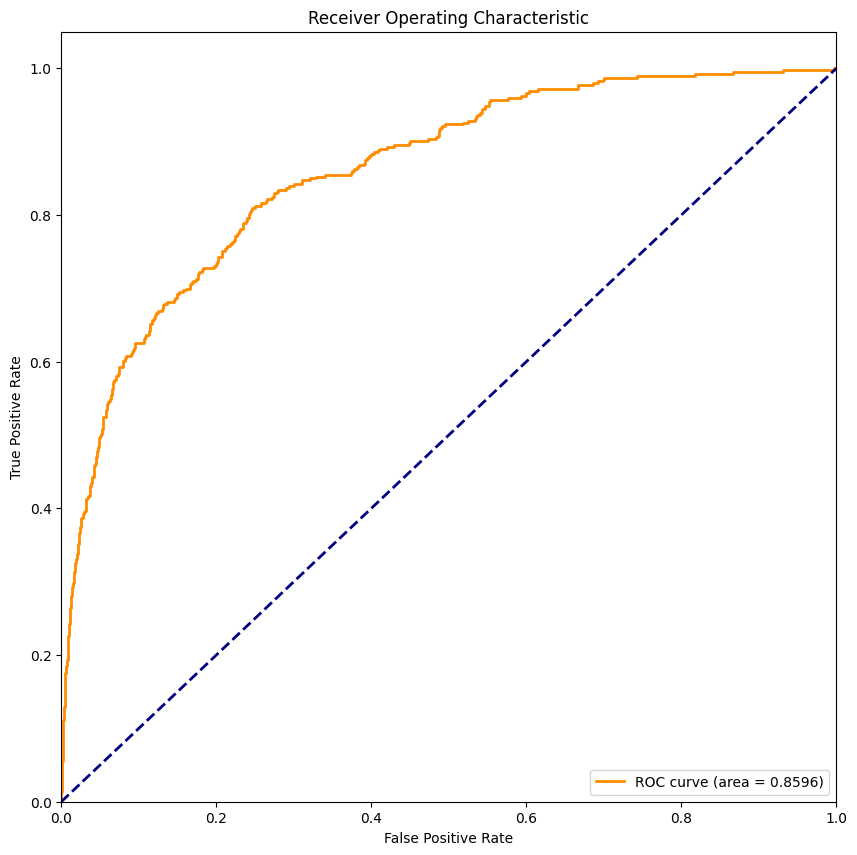

In [7]:
model_report(model, X_test, y_test)

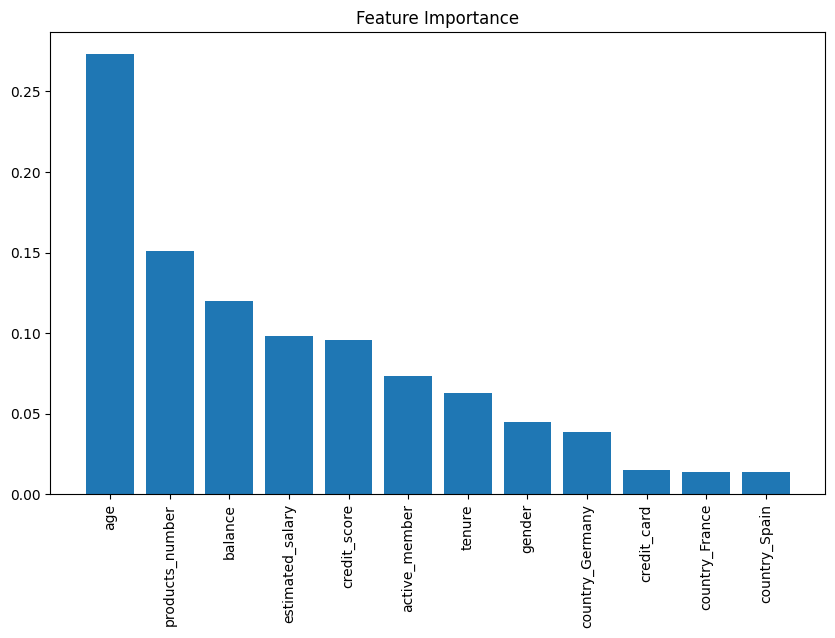

In [8]:
feature_importance(model, X_train)

In [9]:
X.describe()

,gender,tenure,products_number,credit_card,active_member,credit_score,age,balance,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,0.545700,5.012800,1.530200,0.70550,0.515100,2.913225e-17,7.815970e-18,-6.252776e-17,-2.877698e-17
std,0.497932,2.892174,0.581654,0.45584,0.499797,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,0.000000,0.000000,1.000000,0.00000,0.000000,-3.015640e+00,-3.075343e+00,-1.225848e+00,-1.740268e+00
25%,0.000000,3.000000,1.000000,0.00000,0.000000,-6.945576e-01,-6.113262e-01,-1.225848e+00,-8.535935e-01
50%,1.000000,5.000000,1.000000,1.00000,1.000000,5.546669e-03,-3.594485e-02,3.319639e-01,1.802807e-03
75%,1.000000,7.000000,2.000000,1.00000,1.000000,6.941488e-01,6.266081e-01,8.199205e-01,8.572431e-01
max,1.000000,10.000000,4.000000,1.00000,1.000000,2.095417e+00,3.164771e+00,2.795323e+00,1.737200e+00


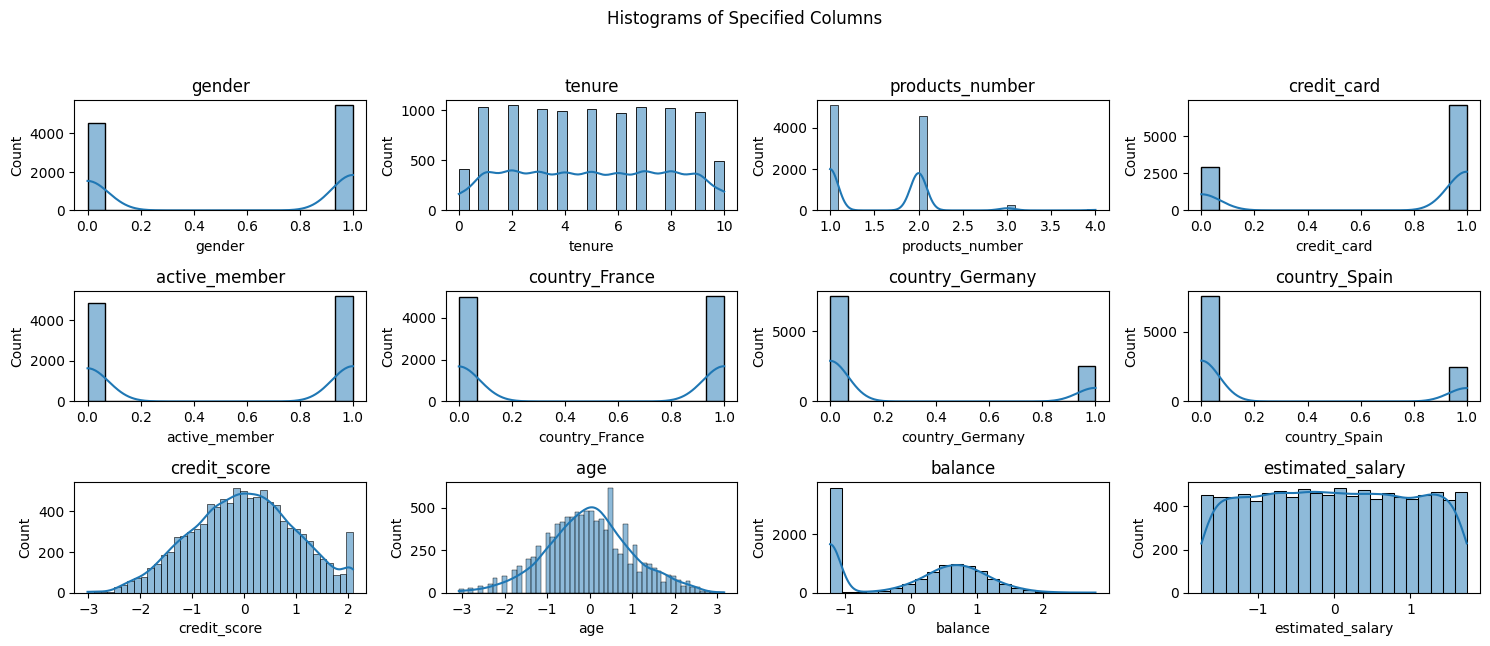

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, column in enumerate(list(X.columns), 1):
    plt.subplot(5, 4, i)
    sns.histplot(X[column], kde=True)
    plt.title(column)

plt.suptitle('Histograms of Specified Columns')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()